<a href="https://colab.research.google.com/github/MarkusStefan/Data_Analytics/blob/main/Exercise1/Outlier_Analysis_Vizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Charts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

countries = ["AT", "DE"]
pop = [9*10**6, 78*10**6]

df = pd.DataFrame({
    "countries" : countries,
    "population" : pop,
    "public debt % of GDP" : [99.91, 63.90],
    "unemployment rate %" : [6.3, 3.54]
    })


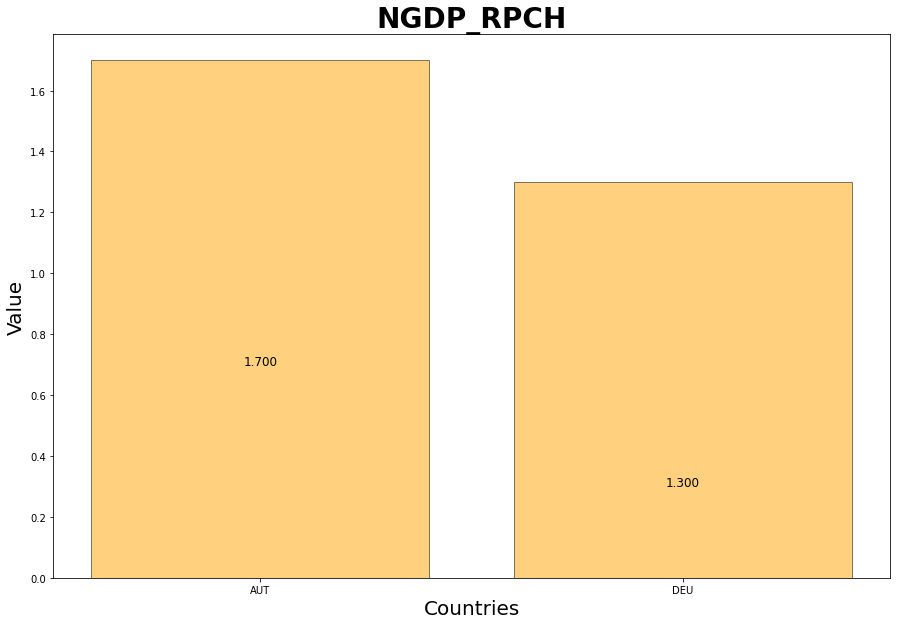

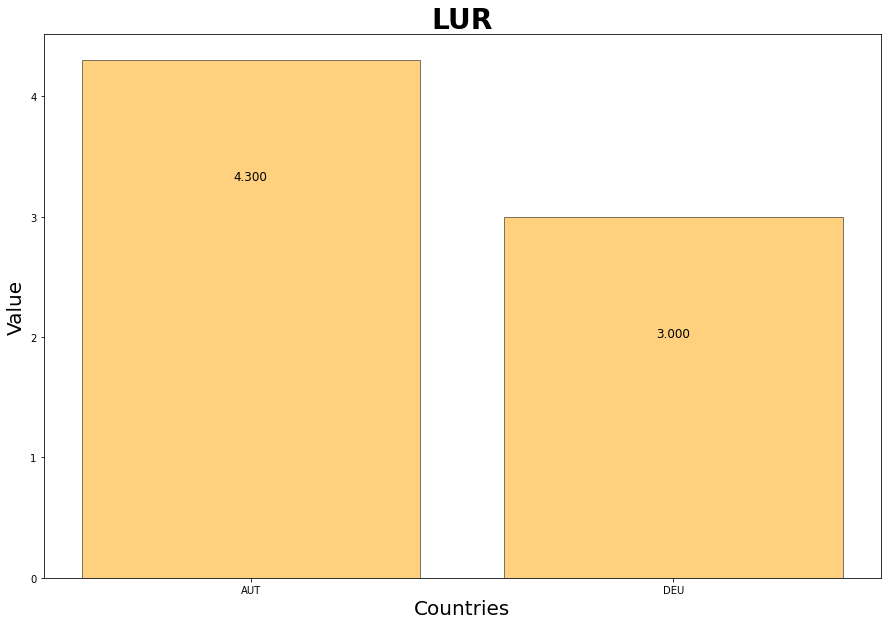

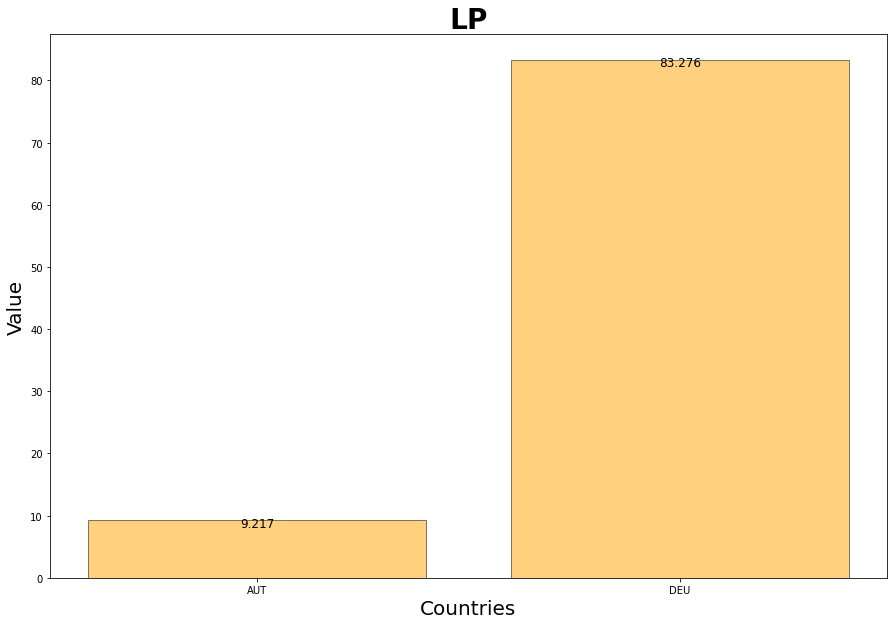

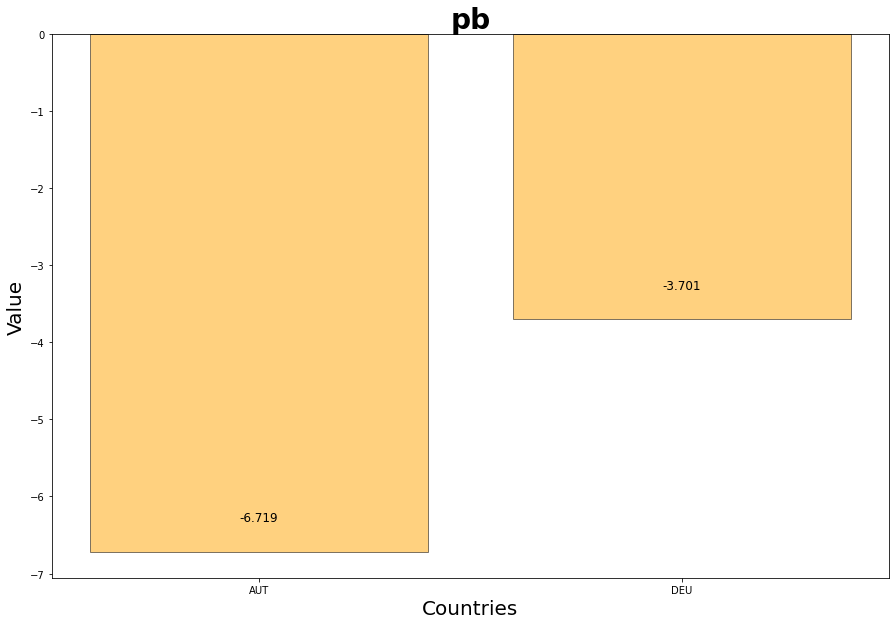

In [2]:
url_list = ["NGDP_RPCH", "LUR", "LP", "pb"]

def create_bar_plt(indicators):
    try:
      for i in indicators:
        url = (f"https://www.imf.org/external/datamapper/api/v1/%s/AUT/DEU?year=2023&yaxis=lin" %i)
        df = pd.read_json(url)
        # selecting the first cell which includes the json data
        data = pd.DataFrame(df.iloc[0,0])
        # converting index to datetime for plotting
        data.index = pd.to_datetime(data.index)
        cntrys = data.columns
        # last row of observations
        vals = data.iloc[-1, :]
        position = -1
        # check for NaN (not a number) values
        if np.isnan(vals).any():
          vals = data.iloc[-3, :]
          position = 0.4
        
        plt.figure(figsize=(15,10))
        plt.bar(cntrys, vals, color="orange", edgecolor="black", alpha=0.5)
        plt.title(i, fontweight='bold', size=28)
        plt.xlabel("Countries", size=20)
        plt.ylabel("Value", size=20)
        for n, v in enumerate(vals):
          plt.text(n, v+position, "{:.3f}".format(v), ha='center', size=12)
        plt.show()
    except ValueError:
      return "Done!"



create_bar_plt(url_list)

# Trial

In [5]:
econ = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Data_Analytics/main/Exercise1/export.csv", sep=";")
econ.iloc(1)

In [6]:
def string_to_int(df):
  try:
    for col in df.columns:
      for val in  df[col]:
        if type(val)==str:
          val = val.replace(',', '')
          val = val.replace(',', '')
  except ValueError:
    print('wrong values entered')
  
  return df
  
string_to_int(econ)



,Year,GDPAT,GDPpCAT,INFAT,UNRATEAT,GOVREVAT,GOVEXPAT,GDPDE,GDPpCDE,INFDE,UNRATEDE,GOVREVDE,GOVEXPDE,Unnamed: 13,Unnamed: 14
0,1980,177286,"10,076.423",53215,"1.600,00",NaN,NaN,"-3.865,00","1,683.158","10,309.039",48740,"3.359,00",n/a,NaN,-15215
1,1981,177110,"10,705.333",56837,"2.200,00",NaN,NaN,"-3.042,00","1,685.015","10,740.646",51822,"4.831,00",n/a,NaN,-4911
2,1982,180489,"11,476.973",59929,"3.100,00",NaN,NaN,0.703,"1,671.735","11,172.766",54546,"6.734,00",n/a,NaN,6007
3,1983,185550,"12,266.397",61928,"3.700,00",NaN,NaN,0.276,"1,697.724","11,756.427",56338,"8.099,00",n/a,NaN,4611
4,1984,186166,"12,875.966",65436,"3.800,00",NaN,NaN,-0.178,"1,745.704","12,383.330",57687,"8.058,00",n/a,NaN,9280
5,1985,190342,"13,561.522",67523,"3.600,00",NaN,NaN,-0.158,"1,783.974","12,960.729",58890,"8.124,00",n/a,NaN,17594
6,1986,194797,"14,239.514",68696,"3.100,00",NaN,NaN,0.204,"1,827.099","13,696.140",58816,"7.834,00",n/a,NaN,37989
7,1987,198071,"14,764.837",69663,"3.800,00",NaN,NaN,-0.263,"1,853.945","14,142.358",58959,"7.843,00",n/a,NaN,43574
8,1988,199974,"15,789.315",70964,"2.676,00",52892.0,56905.0,-0.242,"1,923.202","14,800.471",59709,"7.735,00",n/a,NaN,54677
9,1989,207747,"16,849.338",72561,"2.348,00",55351.0,59225.0,0.248,"1,998.456","15,585.184",61368,"6.790,00",n/a,NaN,58960


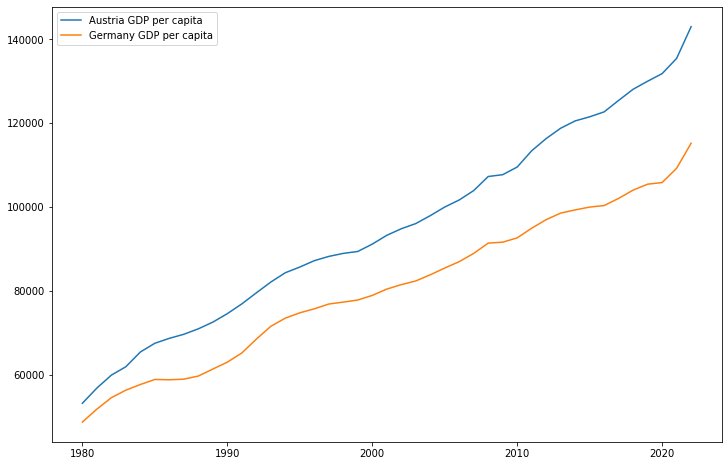

In [7]:
plt.figure(figsize=(12,8))
plt.plot(econ.Year, econ["INFAT"])
plt.plot(econ.Year, econ["UNRATEDE"])
plt.legend(['Austria GDP per capita', 'Germany GDP per capita'])
#plt.plot(df.Date, mean, color='r')
#plt.plot(df.Date, sd1, linestyle='dashed', ntry)

# Real GDP Growth Rate


In [8]:
url = "https://www.imf.org/external/datamapper/api/v1/NGDP_RPCH/AUT/DEU?year=2023&yaxis=lin"
response = requests.get(url)
data = response.json()

df = pd.read_json(url)

print(data)

{'values': {'NGDP_RPCH': {'AUT': {'1980': 2.3, '1981': -0.1, '1982': 1.9, '1983': 2.8, '1984': 0.3, '1985': 2.2, '1986': 2.3, '1987': 1.7, '1988': 1, '1989': 3.9, '1990': 4.3, '1991': 3.4, '1992': 2.1, '1993': 0.5, '1994': 2.4, '1995': 2.7, '1996': 2.4, '1997': 2.1, '1998': 3.6, '1999': 3.6, '2000': 3.4, '2001': 1.3, '2002': 1.7, '2003': 0.9, '2004': 2.7, '2005': 2.2, '2006': 3.5, '2007': 3.7, '2008': 1.5, '2009': -3.8, '2010': 1.8, '2011': 2.9, '2012': 0.7, '2013': 0, '2014': 0.7, '2015': 1, '2016': 2, '2017': 2.3, '2018': 2.5, '2019': 1.5, '2020': -6.7, '2021': 4.6, '2022': 4.7, '2023': 1, '2024': 1.9, '2025': 1.8, '2026': 1.7, '2027': 1.7}, 'DEU': {'1980': 1.3, '1981': 0.1, '1982': -0.8, '1983': 1.6, '1984': 2.8, '1985': 2.2, '1986': 2.4, '1987': 1.5, '1988': 3.7, '1989': 3.9, '1990': 5.7, '1991': 5, '1992': 1.9, '1993': -1, '1994': 2.4, '1995': 1.5, '1996': 0.8, '1997': 1.8, '1998': 2, '1999': 1.9, '2000': 2.9, '2001': 1.7, '2002': -0.2, '2003': -0.7, '2004': 1.2, '2005': 0.7, '200

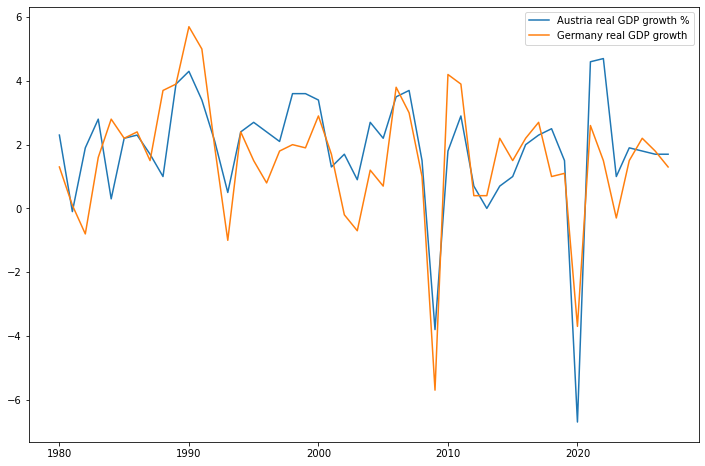

In [9]:
# selecting the first cell which includes the json data
nGDP = pd.DataFrame(df.iloc[0,0])
# converting index to datetime for plotting
nGDP.index = pd.to_datetime(nGDP.index)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(nGDP.index, nGDP['AUT'])
plt.plot(nGDP.index, nGDP['DEU'])
plt.legend(['Austria real GDP growth %', 'Germany real GDP growth'])

# Unemployment Rate

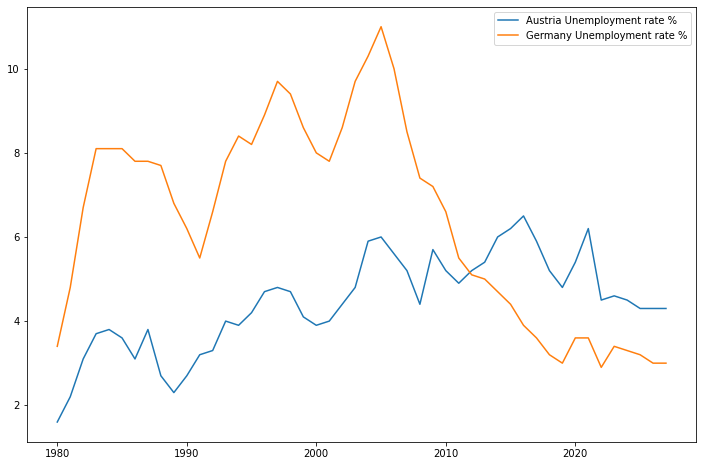

In [10]:
# International Monetary Fund API
url = "https://www.imf.org/external/datamapper/api/v1/LUR/AUT/DEU?year=2023&yaxis=lin"
response = requests.get(url)
data = response.json()

df = pd.read_json(url)

# selecting the first cell which includes the json data
ue = pd.DataFrame(df.iloc[0,0])
# converting index to datetime for plotting
ue.index = pd.to_datetime(ue.index)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(ue.index, ue['AUT'])
plt.plot(ue.index, ue['DEU'])
plt.legend(['Austria Unemployment rate % ', 'Germany Unemployment rate %'])

# Public Debt 

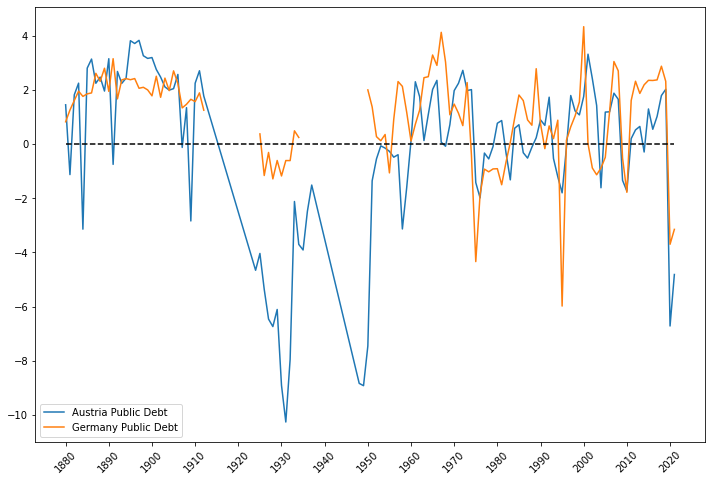

In [11]:
# IMF API
url = "https://www.imf.org/external/datamapper/api/v1/pb/AUT/DEU?year=2023&yaxis=lin"
response = requests.get(url)
data = response.json()

df = pd.read_json(url)

# selecting the first cell which includes the json data
pubdebt = pd.DataFrame(df.iloc[0,0])
# remove last row (inapropriate ordering of data)
# converting index to datetime for plotting
pubdebt.index = [int(i) for i in pubdebt.index] #pd.to_datetime(pubdebt.index)
pubdebt = pubdebt.iloc[:-1]
plt.figure(figsize=(12,8))
plt.plot(pubdebt.index, pubdebt['AUT'])
plt.plot(pubdebt.index, pubdebt['DEU'])
# 0-line for orientation
plt.plot(pubdebt.index, [0]*len(pubdebt.index), color='k', linestyle='dashed')
plt.xticks(np.arange(pubdebt.index[0], pubdebt.index[-1], 100), rotation=45)
# 10-step interval for x-axis values
plt.xticks(np.arange(1880, 2023, 10), rotation=45)
plt.legend(['Austria Public Debt ', 'Germany Public Debt'])

In [12]:
pubdebt.iloc[-1,:]

AUT   -4.817248
DEU   -3.150330
Name: 2021, dtype: float64

In [ ]:
# IMF API
url = "https://www.imf.org/external/datamapper/api/v1/LP/AUT/DEU?year=2022&yaxis=lin"

df = pd.read_json(url)

# selecting the first cell which includes the json data
pop = pd.DataFrame(df.iloc[0,0])
# remove last row (inapropriate ordering of data)
# converting index to datetime for plotting
pop.index =  pd.to_datetime(pop.index) #[int(i) for i in pop.index]
#pubdebt = pubdebt.iloc[:-1]
plt.figure(figsize=(12,8))
plt.plot(pop.index, pop['AUT'])
plt.plot(pop.index, pop['DEU'])
#plt.plot(pop.index, [0]*len(pop.index), color='k', linestyle='dashed')
plt.xticks(np.arange(pop.index[0], pop.index[-1], 100), rotation=45)
#plt.xticks(np.arange(1880, 2023, 10), rotation=45)
plt.legend(['Austria Public Debt ', 'Germany Public Debt'])

# barplots

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(countries, pop, color="orange", edgecolor="black", alpha=0.5)
plt.title("Population AT vs. DE", size=28, fontweight='bold', style='oblique')
plt.xlabel('Countries', size=20)
plt.ylabel('Population in 10^7', size=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Inappropriate Plots

In [4]:
deaths = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Data_Analytics/main/Exercise1/Death_Causes_Eurostat.csv")
deaths

,TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Belgium,Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest.1,Vlaams Gewest,Prov. Antwerpen,Prov. Limburg (BE),Prov. Oost-Vlaanderen,...,Kuzeydogu Anadolu,"Erzurum, Erzincan, Bayburt","Agri, Kars, Igdir, Ardahan",Ortadogu Anadolu,"Malatya, Elazig, Bingöl, Tunceli","Van, Mus, Bitlis, Hakkari",Güneydogu Anadolu,"Gaziantep, Adiyaman, Kilis","Sanliurfa, Diyarbakir","Mardin, Batman, Sirnak, Siirt"
0,2011,1063.11,1031.39,1023.10,985.18,985.18,961.63,961.02,966.49,1003.86,...,879.42,992.67,722.30,756.09,902.20,480.78,845.31,1032.99,768.65,686.20
1,2012,1070.44,1040.01,1051.47,1046.26,1046.26,987.50,1008.16,989.11,1024.69,...,841.98,913.73,738.35,756.06,899.21,486.10,826.94,997.60,763.86,672.80
2,2013,1042.47,1029.41,1035.24,1002.35,1002.35,974.57,983.58,949.99,1009.61,...,1127.74,1159.26,1080.41,1008.10,1032.97,956.46,982.65,1146.67,943.50,805.28
3,2014,1006.92,1002.77,970.80,956.81,956.81,904.64,920.99,887.71,926.68,...,1181.53,1154.29,1219.01,1062.85,1067.54,1046.47,1046.14,1170.74,1014.87,911.31
4,2015,1040.60,1036.21,1001.94,980.69,980.69,933.31,950.96,920.85,968.42,...,1168.61,1169.21,1164.09,1065.52,1055.64,1070.48,1031.70,1156.30,988.34,914.23
5,2016,999.05,997.62,960.71,944.60,944.60,889.05,907.73,878.01,912.18,...,1175.89,1163.13,1191.30,1099.96,1096.15,1098.72,1117.85,1251.71,1060.88,1006.98
6,2017,1005.68,1003.00,955.70,933.16,933.16,890.26,914.46,867.80,908.65,...,1164.47,1168.23,1155.53,1088.48,1069.89,1111.86,1008.50,1128.72,963.13,903.60
7,2018,994.75,998.29,944.18,916.33,916.33,881.75,895.29,863.05,898.47,...,1151.88,1133.24,1174.28,1066.62,1017.11,1152.35,1064.99,1156.71,1043.45,970.94
8,2019,968.70,NaN,910.45,914.93,914.93,848.06,857.62,844.13,877.01,...,1124.32,1117.38,1130.67,1062.25,1027.18,1117.83,1111.85,1219.80,1102.08,975.96
9,2020,1061.41,NaN,1050.91,1150.25,1150.25,951.96,971.79,931.53,979.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


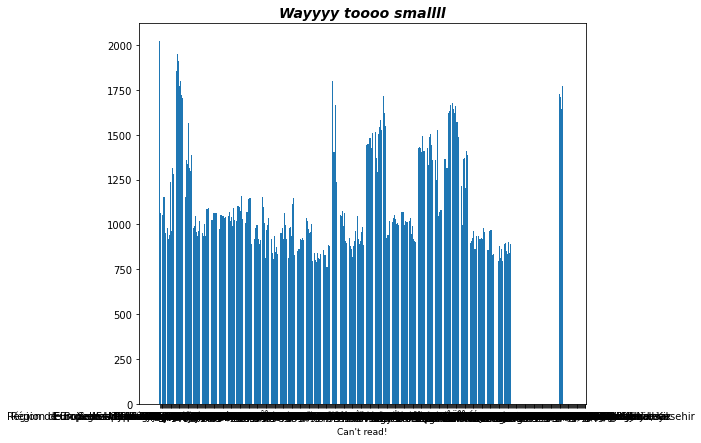

In [7]:
plt.figure(figsize=(8, 7))
plt.bar(x=deaths.columns, height=deaths.iloc[-1, :])
plt.title('Wayyyy toooo smallll', size=14, fontweight='bold', style='italic')
plt.xlabel("Can't read!", size=9)
plt.show()

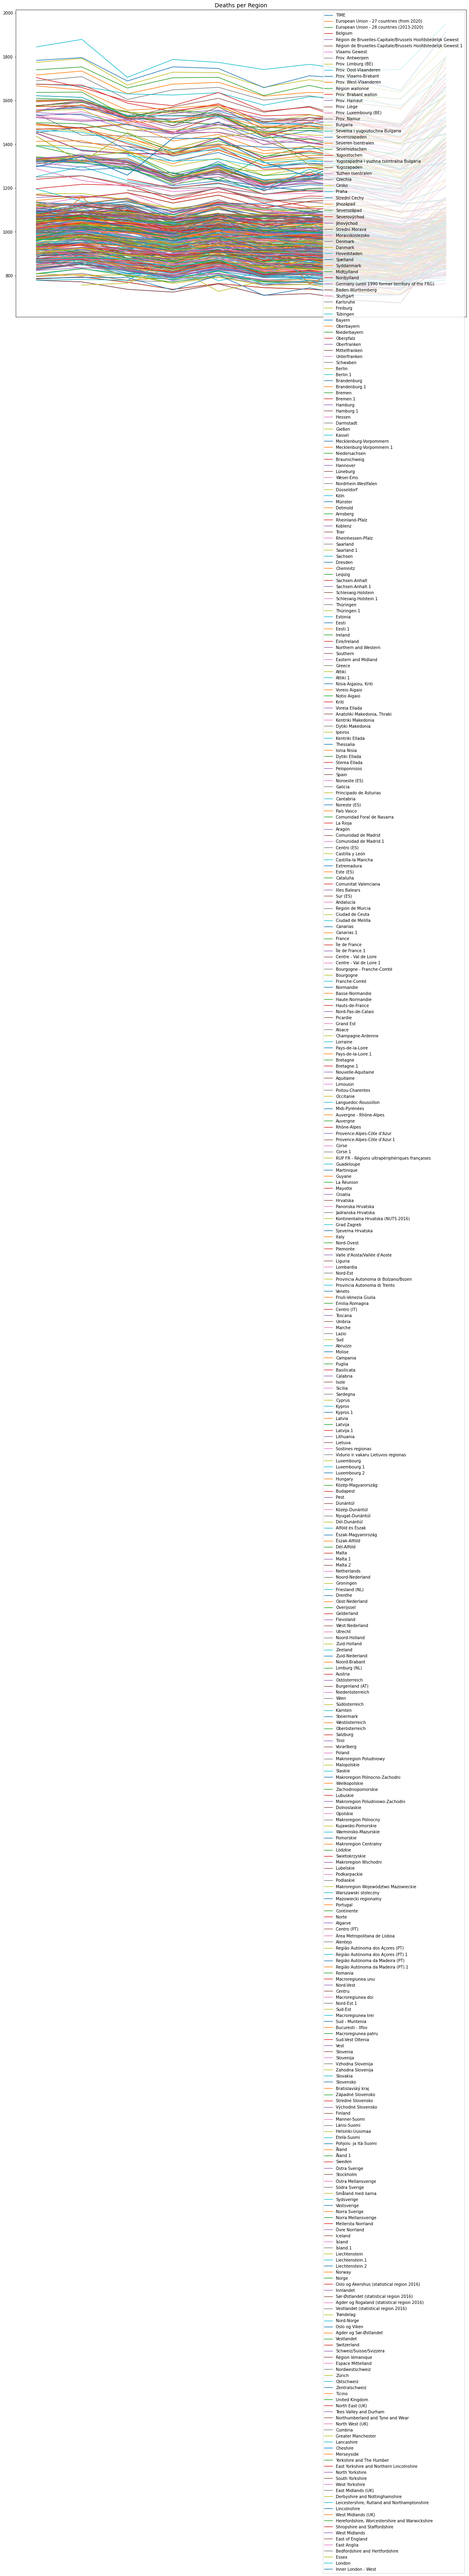

In [19]:
date = pd.to_datetime(deaths['TIME'])
plt.figure(figsize=(20,14))
for col in range(1, len(deaths.columns)):
  plt.plot(date, deaths.iloc[:, col])
  if col > 420:
    break
  continue
plt.title('Deaths per Region', size=14)


names = [str(n) for n in deaths.columns]

plt.legend(names)  

plt.show()